In [0]:
import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
column_names = ['Movie Title', 'Genre', 'Movie Duration', 'Trailer Duration']

dataset_path = './movie_data.csv'

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=",")

dataset = raw_dataset.copy()
dataset.tail()

,Movie Title,Genre,Movie Duration,Trailer Duration
5023,Signed Sealed Delivered,Comedy|Drama,5220,61
5024,The Following,Crime|Drama|Mystery|Thriller,2580,231
5025,A Plague So Pleasant,Drama|Horror|Thriller,4560,75
5026,Shanghai Calling,Comedy|Drama|Romance,6000,142
5027,My Date with Drew,Documentary,5400,126


In [0]:
def get_genre_from_string(genre):
  if genre == 'Action':
    return 1

dataset.pop('Movie Title')
dataset.pop('Movie Duration')

origin = dataset.pop('Genre')
dataset['Action'] = origin.str.startswith('Action')*1.0
dataset['Comedy'] = origin.str.startswith('Comedy')*1.0
dataset['Drama'] = origin.str.startswith('Drama')*1.0
dataset['Mystery'] = origin.str.startswith('Mystery')*1.0
dataset['Thriller'] = origin.str.startswith('Thriller')*1.0
dataset['Romance'] = origin.str.startswith('Romance')*1.0
dataset['Crime'] = origin.str.startswith('Crime')*1.0
dataset['Horror'] = origin.str.startswith('Horror')*1.0
dataset['Documentary'] = origin.str.startswith('Documentary')*1.0
dataset['Sci-Fi'] = origin.str.startswith('Sci-Fi')*1.0
dataset['Music'] = origin.str.startswith('Music')*1.0
dataset['Fantasy'] = origin.str.startswith('Fantasy')*1.0
dataset['Western'] = origin.str.startswith('Western')*1.0
dataset['Biography'] = origin.str.startswith('Biography')*1.0
dataset['Adventure'] = origin.str.startswith('Adventure')*1.0
dataset['Animation'] = origin.str.startswith('Animation')*1.0
dataset['Family'] = origin.str.startswith('Family')*1.0
dataset['Sport'] = origin.str.startswith('Sport')*1.0

dataset.tail()

,Trailer Duration,Action,Comedy,Drama,Mystery,Thriller,Romance,Crime,Horror,Documentary,Sci-Fi,Music,Fantasy,Western,Biography,Adventure,Animation,Family,Sport
5023,61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5024,231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5025,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5026,142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

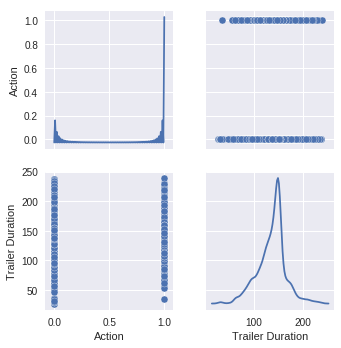

In [0]:
sns.pairplot(train_dataset[["Action", "Trailer Duration"]], diag_kind="kde")

In [0]:
train_stats = train_dataset.describe()
train_stats.pop('Trailer Duration')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Action,4022.0,0.224515,0.417315,0.0,0.0,0.0,0.0,1.0
Comedy,4022.0,0.264545,0.441145,0.0,0.0,0.0,1.0,1.0
Drama,4022.0,0.190453,0.392707,0.0,0.0,0.0,0.0,1.0
Mystery,4022.0,0.006962,0.083156,0.0,0.0,0.0,0.0,1.0
Thriller,4022.0,0.004227,0.064884,0.0,0.0,0.0,0.0,1.0
Romance,4022.0,0.000746,0.027304,0.0,0.0,0.0,0.0,1.0
Crime,4022.0,0.070860,0.256623,0.0,0.0,0.0,0.0,1.0
Horror,4022.0,0.047240,0.212179,0.0,0.0,0.0,0.0,1.0
Documentary,4022.0,0.016410,0.127061,0.0,0.0,0.0,0.0,1.0
Sci-Fi,4022.0,0.002486,0.049807,0.0,0.0,0.0,0.0,1.0


In [0]:
train_labels = train_dataset.pop('Trailer Duration')
test_labels = test_dataset.pop('Trailer Duration')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = (train_dataset)
normed_test_data = (test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintEpoch(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print(f'Epoch {epoch}')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintEpoch()])

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,818.644477,21.328021,818.644477,788.048356,21.586534,788.048356,995
996,818.899496,21.333306,818.899496,788.914131,21.556206,788.914131,996
997,818.652776,21.317855,818.652776,803.382922,21.460686,803.382922,997
998,816.489253,21.311615,816.489253,823.697435,21.498280,823.697435,998
999,818.890098,21.318888,818.890098,797.312827,21.470914,797.312827,999


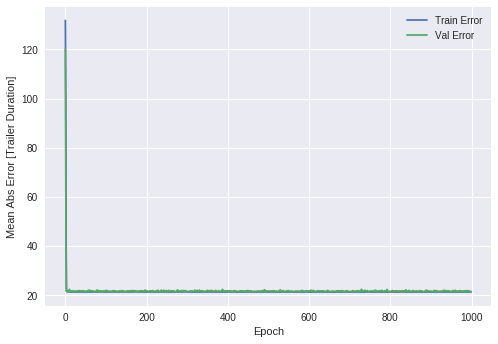

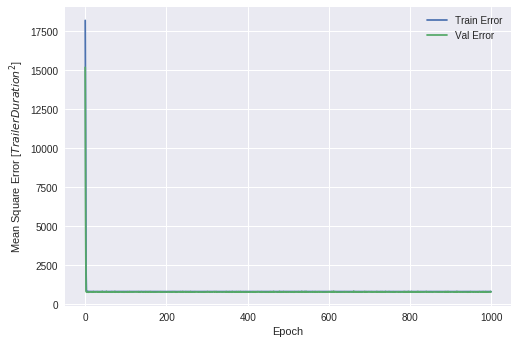

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Trailer Duration]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Trailer Duration^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()

plot_history(history)


Epoch 0


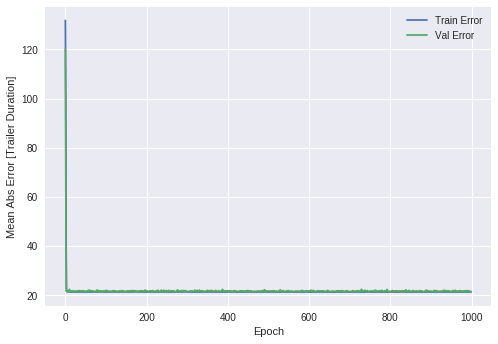

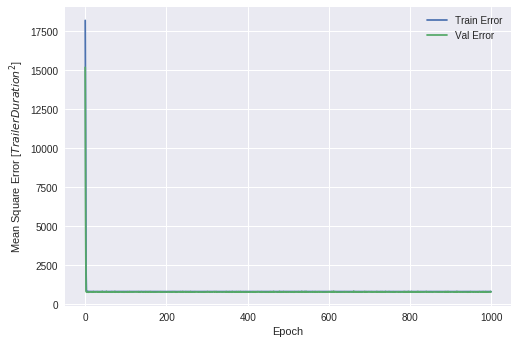

In [0]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintEpoch()])

plot_history(history)


In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
52,819.333701,21.368640,819.333701,788.679419,21.524882,788.679419,52
53,818.331934,21.300845,818.331934,785.298790,21.722308,785.298790,53
54,818.431916,21.324804,818.431916,788.744727,21.610886,788.744727,54
55,817.788542,21.290838,817.788542,794.446693,21.544094,794.446693,55
56,819.058317,21.356226,819.058317,790.171972,21.643331,790.171972,56


In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Trailer Duration in seconds".format(mae))

Testing set Mean Abs Error: 20.97 Trailer Duration in seconds


In [0]:
d = {'Action': [1.0]}
d['Comedy'] = [0.0]
d['Drama'] = [0.0]
d['Mystery'] = [0.0]
d['Thriller'] = [0.0]
d['Romance'] = [0.0]
d['Crime'] = [0.0]
d['Horror'] = [0.0]
d['Documentary'] = [0.0]
d['Sci-Fi'] = [0.0]
d['Music'] = [0.0]
d['Fantasy'] = [0.0]
d['Western'] = [0.0]
d['Biography'] = [0.0]
d['Adventure'] = [0.0]
d['Animation'] = [0.0]
d['Family'] = [0.0]
d['Sport'] = [0.0]

df = pd.DataFrame(data=d)
test_predictions = model.predict(df)
test_predictions

array([[139.04176]], dtype=float32)